In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn import metrics

In [2]:
!tar -xzvf /content/fashion-mnist.tar.gz

fashion-mnist_test.csv
fashion-mnist_train.csv
LICENSE.txt


In [3]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [4]:
data = pd.concat([train,test])

In [5]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
np.random.seed(1000)
# Select 20000 images randomly
indices = np.random.choice(70000,20000)

In [11]:
data_ = data.sample(n=35000)

In [14]:
data_.shape

(35000, 785)

In [15]:
x = data_.drop(['label'], axis=1)
y = data_['label']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7)

In [17]:
print('X_train shape:',X_train.shape)
print('X_val shape:',X_val.shape)
print('X_test shape:',X_test.shape)

X_train shape: (24500, 784)
X_val shape: (3150, 784)
X_test shape: (7350, 784)


In [18]:
print('y_train shape:',y_train.shape)
print('y_val shape:',y_val.shape)
print('y_test shape:',y_test.shape)

y_train shape: (24500,)
y_val shape: (3150,)
y_test shape: (7350,)


In [19]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
ypred = pd.DataFrame()

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

## Hierarchical Clustering

### Train Data

[0.31014285 0.38692481 0.35996439 0.30925818 0.32459993 0.28389621
 0.28090785 0.25655897 0.24220513 0.24965192]


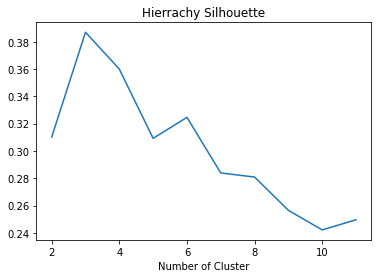

In [21]:
#Applying hierarchical clustering with the evaluation based on Silhouette Score
sil_agg = np.arange(10,dtype="double")
for k in np.arange(10):
  agg = AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=k+2)
  agg.fit(X_pca)
  sil_agg[k] = metrics.silhouette_score(X_pca,agg.labels_,metric='euclidean')
print(sil_agg)

plt.title("Hierrachy Silhouette")
plt.xlabel("Number of Cluster")
plt.plot(np.arange(2,12,1),sil_agg)

### Validation Data

[0.13489496 0.05480511 0.07505127 0.03650255 0.03098671 0.01304108
 0.00915171 0.01032926 0.01100885 0.03660229]


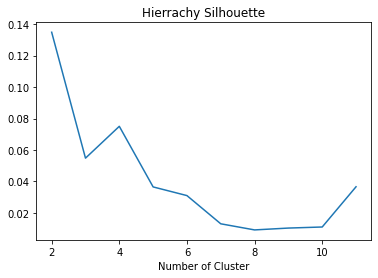

In [23]:
sil_agg = np.arange(10,dtype="double")
for k in np.arange(10):
  agg = AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=k+2)
  agg.fit(X_val)
  sil_agg[k] = metrics.silhouette_score(X_val,agg.labels_,metric='euclidean')
print(sil_agg)

plt.title("Hierrachy Silhouette")
plt.xlabel("Number of Cluster")
plt.plot(np.arange(2,12,1),sil_agg)

### Test Data

[0.04958959 0.05456964 0.05404873 0.00015569 0.01173942 0.03273271
 0.05124872 0.04810848 0.04767871 0.04681162]


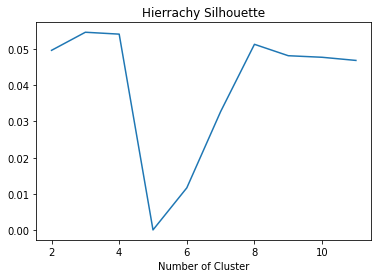

In [25]:
sil_agg = np.arange(10,dtype="double")
for k in np.arange(10):
  agg = AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=k+2)
  agg.fit(X_test)
  sil_agg[k] = metrics.silhouette_score(X_test,agg.labels_,metric='euclidean')
print(sil_agg)

plt.title("Hierrachy Silhouette")
plt.xlabel("Number of Cluster")
plt.plot(np.arange(2,12,1),sil_agg)

## Density-Based Clustering

### Train Data

In [33]:
silhouette_scores = []

for i in range(10):
   dbscan = DBSCAN(eps=2, min_samples=10, metric='euclidean')
   cluster = dbscan.fit_predict(X_pca)
   silhouette_scores.append(metrics.silhouette_score(X_pca, cluster))

[0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534, 0.3990678143095534]


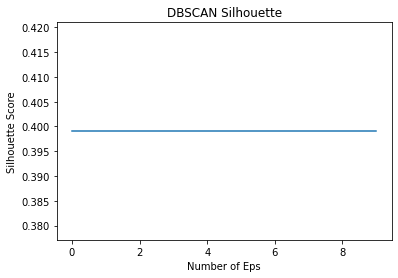

In [35]:
print(silhouette_scores)
plt.title("DBSCAN Silhouette")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Eps")
plt.plot(np.arange(0,10,1),silhouette_scores)

Since the given data is high dimensional so Density-based Clustering performed better than Hierarchical Clustering.